## Load Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

data = pd.read_csv('data_london/processed_data/listing_data_clean_final_v2_extra.csv')

pd.set_option('display.max_columns', None)

col_to_drop = ['latitude','longitude','host_total_listings_count','property_type','room_type',
              'number_of_reviews','reviews_per_month','host_is_superhost']

#reviews_cols = ['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                #'review_scores_communication','review_scores_location','review_scores_value']

#data['calculated_review_rating'] = data[reviews_cols].sum(axis=1)
#data['calculated_review_rating'] = round(data['calculated_review_rating']/6,3)

data.drop(columns=col_to_drop, inplace=True)
#data.drop(columns=reviews_cols, inplace=True)
data.head(3)
data.shape

(57636, 46)

In [3]:
# one hot encoding
# do not drop one dummy variable
data = pd.get_dummies(data, drop_first=False)
data.shape

(57636, 77)

In [4]:
data.head(3)

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,region_Central,region_East,region_North,region_South,region_West,property_room_type_Apartment_Entire home/apt,property_room_type_Apartment_Hotel room,property_room_type_Apartment_Private room,property_room_type_Apartment_Shared room,property_room_type_Bungalow_Entire home/apt,property_room_type_Bungalow_Private room,property_room_type_Bungalow_Shared room,property_room_type_Guesthouse_Entire home/apt,property_room_type_Guesthouse_Hotel room,property_room_type_Guesthouse_Private room,property_room_type_Guesthouse_Shared room,property_room_type_Hotel_Entire home/apt,property_room_type_Hotel_Hotel room,property_room_type_Hotel_Private room,property_room_type_Hotel_Shared room,property_room_type_Others_Entire home/apt,property_room_type_Others_Hotel room,property_room_type_Others_Private room,property_room_type_Others_Shared room
0,0.8,0.88,1,1,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,6,0,0,0,1,2,0,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.86,1,1,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,4,1,1,1,1,0,0,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.8,0.95,1,1,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,2,1,0,0,15,0,0,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
col_to_drop_2 = ['property_room_type_Others_Entire home/apt','property_room_type_Others_Hotel room',
                 'property_room_type_Others_Private room','property_room_type_Others_Shared room']

data.drop(columns=col_to_drop_2, inplace=True)
data.head(3)

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,rating_class,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,region_Central,region_East,region_North,region_South,region_West,property_room_type_Apartment_Entire home/apt,property_room_type_Apartment_Hotel room,property_room_type_Apartment_Private room,property_room_type_Apartment_Shared room,property_room_type_Bungalow_Entire home/apt,property_room_type_Bungalow_Private room,property_room_type_Bungalow_Shared room,property_room_type_Guesthouse_Entire home/apt,property_room_type_Guesthouse_Hotel room,property_room_type_Guesthouse_Private room,property_room_type_Guesthouse_Shared room,property_room_type_Hotel_Entire home/apt,property_room_type_Hotel_Hotel room,property_room_type_Hotel_Private room,property_room_type_Hotel_Shared room
0,0.8,0.88,1,1,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,6,0,0,0,1,2,0,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.86,1,1,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,4,1,1,1,1,0,0,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.8,0.95,1,1,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,2,1,0,0,15,0,0,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,2,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(57636, 73)

In [7]:
#data.dropna(subset=['rating_class'], inplace=True)
data['rating_class'] = data['rating_class'].apply(np.int64)
data['rating_class'].value_counts()

2    50118
1     5434
0     2084
Name: rating_class, dtype: int64

In [8]:
# rearrange columns
df = data[[ col for col in data.columns if col != 'rating_class'] + ['rating_class']]
df.head(3)

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews_ltm,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_duration_days,listing_duration_days,occupancy_rate,crime_rate,hangers,washer,tv,detector,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,region_Central,region_East,region_North,region_South,region_West,property_room_type_Apartment_Entire home/apt,property_room_type_Apartment_Hotel room,property_room_type_Apartment_Private room,property_room_type_Apartment_Shared room,property_room_type_Bungalow_Entire home/apt,property_room_type_Bungalow_Private room,property_room_type_Bungalow_Shared room,property_room_type_Guesthouse_Entire home/apt,property_room_type_Guesthouse_Hotel room,property_room_type_Guesthouse_Private room,property_room_type_Guesthouse_Shared room,property_room_type_Hotel_Entire home/apt,property_room_type_Hotel_Hotel room,property_room_type_Hotel_Private room,property_room_type_Hotel_Shared room,rating_class
0,0.8,0.88,1,1,1,2,1.0,1.0,0.0,65.0,100.0,15.0,1,15.0,1,29,6,0,0,0,1,2,0,3831.0,3556.0,0.010959,0.999,1,1,1,1,1,1,1,1,1,1,523.330908,12785.466793,11786.246428,81.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1.0,0.86,1,1,1,2,1.0,1.0,1.0,100.0,150.0,50.0,2,0.0,10,50,4,1,1,1,1,0,0,3812.0,3796.0,0.298630,1.098,1,1,1,1,1,1,1,1,1,1,728.423310,11869.153805,12392.552363,58.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0.8,0.95,1,1,0,6,2.0,3.0,3.0,300.0,350.0,90.0,3,10.0,3,365,2,1,0,0,15,0,0,3781.0,3340.0,0.095890,1.713,1,1,1,1,1,1,1,1,1,1,302.398372,11059.433984,10904.874110,192.0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


## XGBoost

### Randomized Search CV Hyperparameter Tuning

https://xgboost.readthedocs.io/en/latest/parameter.html

In [8]:
import time
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

start_time=time.time()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

xgb = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', 
                    learning_rate =0.3, random_state=42)

kf = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2019)

grid_values = [{"colsample_bytree": [0.6,0.8,1],'max_depth':[4,5,6,7,8], 
                "n_estimators": [60,80,100,120,140], 'min_child_weight':[1,2,3,4,5,6],
                "subsample":[i/10.0 for i in range(6,10)]}]

clf = model_selection.RandomizedSearchCV(xgb, grid_values, cv = kf, n_iter = 20, verbose = 1, n_jobs=4)

clf.fit(x_train, y_train)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)

print('Time taken:',round((time.time()-start_time)/60,2),'mins')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  8.6min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 19.9min finished


best score: 0.8696104647931604
best parameters:  {'subsample': 0.9, 'n_estimators': 140, 'min_child_weight': 6, 'max_depth': 4, 'colsample_bytree': 0.8}
Time taken: 20.09 mins


In [9]:
# find optimal learning rate & gamma

import time
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

start_time=time.time()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

xgb = XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',
                    subsample=0.9, n_estimators=140, min_child_weight=6, 
                    max_depth=4, colsample_bytree=0.8, random_state=42)

kf = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2019)

grid_values = [{"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
               'gamma':[i/10.0 for i in range(0,5)]}]

clf = model_selection.RandomizedSearchCV(xgb, grid_values, cv = kf, n_iter = 20, verbose = 1, n_jobs=4)

clf.fit(x_train, y_train)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)

print('Time taken:',round((time.time()-start_time)/60,2),'mins')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 19.7min finished


best score: 0.8701960587027184
best parameters:  {'learning_rate': 0.05, 'gamma': 0.4}
Time taken: 19.92 mins


### Final XGBoost Model with Random Search CV Hyperparameter Tuning

In [10]:
# final model

import time
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

start_time=time.time()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

xgb = XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',
                    subsample=0.9, n_estimators=140, min_child_weight=6, 
                    max_depth=4, colsample_bytree=0.8, learning_rate=0.05,
                    gamma=0.4, random_state=42)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average="micro")
recall = metrics.recall_score(y_test, y_pred,average="micro")

report = """
=====================================================
* Evaluation Report of XGBoost Model Classification *
=====================================================

Confusion Matrix:
{}

Accuracy: {}
""".format(metrics.confusion_matrix(y_test, y_pred),
           metrics.accuracy_score(y_test, y_pred))
print(report)
print('The classification report of XGBoost:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))

from sklearn.metrics import f1_score
print('micro averaging f1 score:', f1_score(y_test, y_pred, average='micro'))
print('macro averaging f1 score:', f1_score(y_test, y_pred, average='macro'))
print('weighted averaging f1 score:',f1_score(y_test, y_pred, average='weighted'))

print('Time taken:',round((time.time()-start_time)/60,2),'mins')


* Evaluation Report of XGBoost Model Classification *

Confusion Matrix:
[[    2     4   417]
 [    2    29  1047]
 [    2    12 10013]]

Accuracy: 0.8712699514226232

The classification report of XGBoost:
               precision    recall  f1-score   support

           0       0.33      0.00      0.01       423
           1       0.64      0.03      0.05      1078
           2       0.87      1.00      0.93     10027

    accuracy                           0.87     11528
   macro avg       0.62      0.34      0.33     11528
weighted avg       0.83      0.87      0.82     11528

micro averaging f1 score: 0.8712699514226233
macro averaging f1 score: 0.33074666120741086
weighted averaging f1 score: 0.8151847838559257
Time taken: 0.19 mins


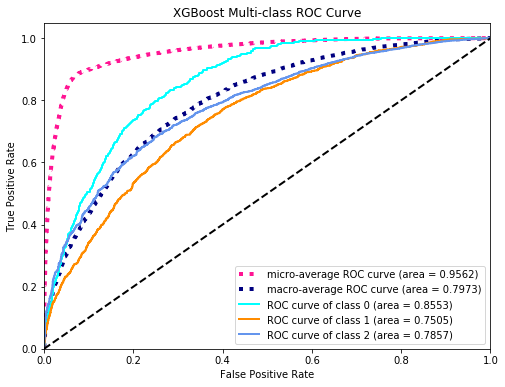

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from xgboost import XGBClassifier
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

# Binarize the output
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]

xgb = XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',
                    subsample=0.9, n_estimators=140, min_child_weight=6, 
                    max_depth=4, colsample_bytree=0.8, learning_rate=0.05,
                    gamma=0.4, random_state=42)

#xgb.fit(x_train, y_train)
y_score = xgb.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Bayesian Optimization Hyperparameter tuning

In [ ]:
#pip install bayesian-optimization

In [9]:
import time
from bayes_opt import BayesianOptimization
from sklearn import preprocessing, model_selection, metrics
import xgboost as xgb

start_time=time.time()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

## Defining the function to be optimized

def xgb_evaluate(**param_range):
    params = {}
    #params['boosting_type'] = 'gbdt'
    params['num_class'] = 3
    params['objective'] = 'multi:softprob'
    params['eval_metric'] = 'mlogloss' ## Used the multi_logloss metric in case of a multiclass problem. Can define you own metrics and also change to binary if we change to a binary problem
    params['learning_rate']=param_range['learning_rate']
    params['colsample_bytree']=param_range['colsample_bytree']
    params['min_child_weight']=param_range['min_child_weight']
    params['max_depth']=int(round(param_range['max_depth']))
    #params['n_estimators']=int(round(param_range['n_estimators']))
    params['subsample']=param_range['subsample']
    params['gamma']=param_range['gamma']
    #params['num_boost_round']=int(round(param_range['num_boost_round']))
    #params['min_gain_to_split']=min_gain_to_split
    #lgb_train_data = lgb.Dataset(x_train, label=y_train, free_raw_data = None)
    xgb_train_data = xgb.DMatrix(x_train, label = y_train) ## LGBM specific code. XGB will follow the same approach. This step not needed for other models
    cv_result = xgb.cv(params,xgb_train_data, num_boost_round = 100, nfold=5, seed=1234,
                       stratified=True,shuffle = True, metrics=('mlogloss')) ##This is a LGBM specific cross validation step. Use generic cv functions for other models. XGB will follow the same approach as LGBM
    #print(cv_result)
    return -min(cv_result['test-mlogloss-mean']) ## Used the multi_logloss metric in case of a multiclass problem. Can define you own metrics and also change to binary if we change to a binary problem

param_range={
#'boosting_type':['gbdt','dart'],
'learning_rate':(0.05, 0.3),
'colsample_bytree': (0.1, 1),
'min_child_weight': (0.1, 1),
'max_depth': (4, 10),
#'n_estimators': (60,120),
'subsample':(0.6, 1),
'gamma':(0,0.5),
            }

bo = BayesianOptimization(xgb_evaluate, param_range)
bo.maximize(init_points = 5, n_iter = 20, acq = 'ei')

parameters = bo.max['params'] # Get the best parameters

final_parameters = {}

final_parameters.update({'booster':'gbtree'})

for k, v in parameters.items():
    if k in ['bagging_freq','min_data_in_leaf','max_depth','max_bin','num_leaves']:
        final_parameters[k] = int(round(v))
    else:
        final_parameters[k] = round(v,4)

final_parameters

print('Time taken:',round((time.time()-start_time)/60,2),'mins')

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
|  1        | -0.3914   |  0.1408   |  0.1417   |  0.1868   |  5.628    |  0.9636   |  0.6523   |
|  2        | -0.3899   |  0.4301   |  0.4588   |  0.1988   |  7.715    |  0.2809   |  0.602    |
|  3        | -0.3856   |  0.9209   |  0.3718   |  0.1962   |  6.297    |  0.2301   |  0.7594   |
|  4        | -0.3859   |  0.5137   |  0.07633  |  0.06234  |  7.934    |  0.239    |  0.8093   |
|  5        | -0.3865   |  0.5033   |  0.1354   |  0.1855   |  7.063    |  0.3953   |  0.733    |
|  6        | -0.4039   |  0.1333   |  0.2819   |  0.2907   |  9.822    |  0.824    |  0.6559   |
|  7        | -0.3897   |  1.0      |  0.0      |  0.05     |  7.386    |  0.1      |  1.0      |
|  8        | -0.39     |  0.5173   |  0.0      |  0.3      |  6.44     |  0.1      |  0.6      |
|  9        | -0.383

In [8]:
# final model

import time
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

start_time=time.time()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

xgb = XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',
                    subsample=0.8861, n_estimators=100, min_child_weight=0.6325, 
                    max_depth=7, colsample_bytree=0.9413, learning_rate=0.08724,
                    gamma=0.5, random_state=42)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average="micro")
recall = metrics.recall_score(y_test, y_pred,average="micro")

report = """
=====================================================
* Evaluation Report of XGBoost Model Classification *
=====================================================

Confusion Matrix:
{}

Accuracy: {}
""".format(metrics.confusion_matrix(y_test, y_pred),
           metrics.accuracy_score(y_test, y_pred))
print(report)
print('The classification report of XGBoost:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))

from sklearn.metrics import f1_score
print('micro averaging f1 score:', f1_score(y_test, y_pred, average='micro'))
print('macro averaging f1 score:', f1_score(y_test, y_pred, average='macro'))
print('weighted averaging f1 score:',f1_score(y_test, y_pred, average='weighted'))

print('Time taken:',round((time.time()-start_time)/60,2),'mins')


* Evaluation Report of XGBoost Model Classification *

Confusion Matrix:
[[  13   20  390]
 [   7   69 1002]
 [   8   45 9974]]

Accuracy: 0.8723108952116586

The classification report of XGBoost:
               precision    recall  f1-score   support

           0       0.46      0.03      0.06       423
           1       0.51      0.06      0.11      1078
           2       0.88      0.99      0.93     10027

    accuracy                           0.87     11528
   macro avg       0.62      0.36      0.37     11528
weighted avg       0.83      0.87      0.82     11528

micro averaging f1 score: 0.8723108952116586
macro averaging f1 score: 0.36798853158314865
weighted averaging f1 score: 0.8238072578273137
Time taken: 0.28 mins


In [12]:
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=xgb.predict(x_test), 
    y_score=xgb.predict_proba(x_test))

print(report_with_auc)

             precision    recall  f1-score  support     pred       AUC
0             0.464286  0.030733  0.057650    423.0     28.0  0.870286
1             0.514925  0.064007  0.113861   1078.0    134.0  0.766926
2             0.877529  0.994714  0.932455  10027.0  11366.0  0.802719
avg / total   0.828459  0.872311  0.823807  11528.0  11528.0  0.959037


In [12]:
from sklearn.metrics import roc_auc_score

y_prob = xgb.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.758353 (macro),
0.811735 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.813310 (macro),
0.801851 (weighted by prevalence)


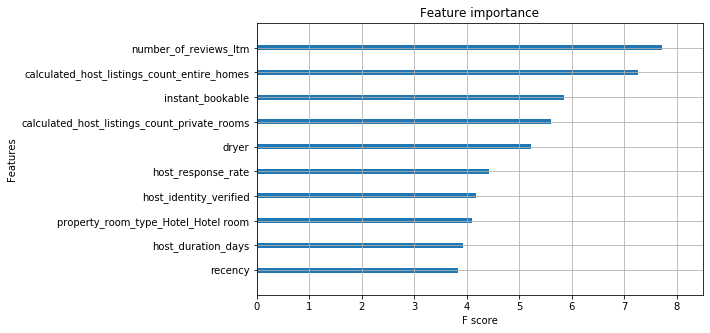

In [9]:
import xgboost
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, metrics
from xgboost import XGBClassifier

x = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(int)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

xgb = XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',
                    subsample=0.8861, n_estimators=100, min_child_weight=0.6325, 
                    max_depth=7, colsample_bytree=0.9413, learning_rate=0.08724,
                    gamma=0.5, random_state=42)

mymodel = xgb.fit(x_train, y_train)

from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 5)
#plot_importance(mymodel, importance_type='cover', max_num_features = 10,show_values=False)
plot_importance(mymodel, importance_type='gain', max_num_features = 10,show_values=False)

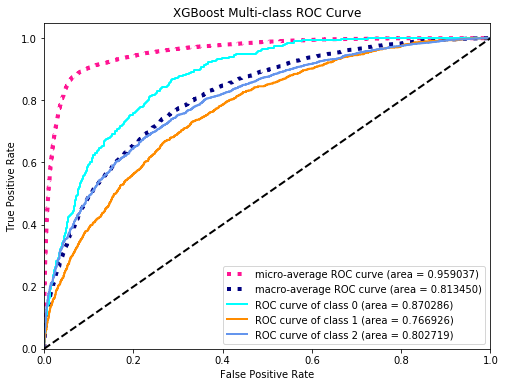

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from xgboost import XGBClassifier
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_auc_score

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].astype(int).values

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 888)

# Binarize the output
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]

xgb = XGBClassifier(objective='multi:softprob',eval_metric='mlogloss',
                    subsample=0.8861, n_estimators=100, min_child_weight=0.6325, 
                    max_depth=7, colsample_bytree=0.9413, learning_rate=0.08724,
                    gamma=0.5, random_state=42)

#xgb.fit(x_train, y_train)
y_score = xgb.fit(x_train, y_train).predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.6f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.6f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.6f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()